# K-Fold Cross Validation

Cross-validation, makine öğrenmesi modelinin görmediği veriler üzerindeki performansını mümkün olduğunca objektif ve doğru bir şekilde değerlendirmek için kullanılan istatistiksel bir yeniden örnekleme(resampling) yöntemidir.

        K-Fold Cross Validation, sınıflandırma modellerinin değerlendirilmesi ve modelin eğitilmesi için veri setini parçalara ayırma yöntemlerinden biridir. 

modelimizin başarısını tek bir train-test split yaklaşımıyla ölçmek yerine k katlı bir cross-validation uygulanırsa farklı bölünmeler için farklı accuracy skorları elde ettiğimizi ve bu skorların genellikle %90 dan düşük olduğunu ve ortalama olarak da % 85 civarında olduğunu görmüş olurduk. 

k-fold cross validation, veriyi belirlenen bir k sayısına göre eşit parçalara böler, her bir parçanın hem eğitim hem de test için kullanılmasını sağlar, böylelikle dağılım ve parçalanmadan kaynaklanan sapma ve hataları asgariye indirir. 


Ancak modeli k kadar eğitmek ve test etmek gibi ilave bir veri işleme yük ve zamanı ister. Bu durum eğitim ve testi kısa süren küçük ve orta hacimli veriler için sorun olmasa da büyük hacimli veri setlerinde hesaplama ve zaman yönünden maliyetli olabilir.

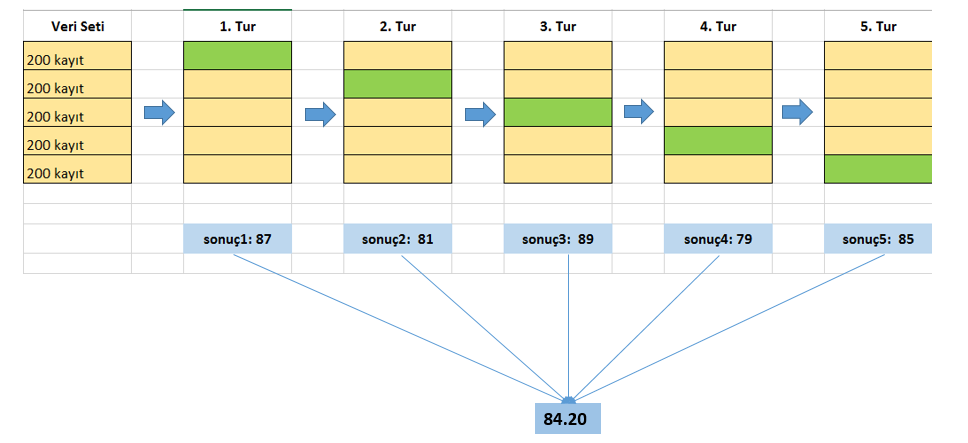

yukarıda 1000 parçalık kayıtlı veri vardır ve 200 kayıttan oluşan eş parçalara ayrılmış.
Ve parçalar tek tek eğitim ve test verileri üzerinde çalıştırılıyor.


Her turda elde edilen test sonucu toplanıyor ve k ya bölünüyor. çıkan sonuç model performansını verir.


farklı sınıflandırma algoritması üzerinde denedikten sonra en yüksek puan alan algoritma daha başarılı sınıflandırmıştır diyoruz.


### 5 X 2 Cross Validation

 k-fold cross-validation tekniğinin değişik vir versiyonudur. Bu teknikte tüm veri seti her defasında rastgele ikiye bölünür. Önce bir yarısı eğitim diğer yarısı test olarak kullanılır. Daha sonra tam tersi yapılır. Bu süreç istendiği kadar (N defa) tekrarlanır ve test sonuçları toparlanır (örneğin ortalaması).

* sklearn.model_selection KFold 
* sklearn.model_selection StratifiedKFold 
Benzeselerde aslında biraz farklı iş yaparlar ve multiclassification da StratifiedKFold daha iyi sınıflandırma yapmaya yarayabilir. 
Ör iris çiçeğinde bulunan 3 farklı sınıf olması 
Yine de Araştır.

##### Coding

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits

In [5]:
digits= load_digits()

In [10]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [15]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

C:\Users\ispir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9611111111111111

In [16]:
svm= SVC()
svm.fit(X_train, y_train)
svm.score(X_test,y_test)

0.975925925925926

In [17]:
rdmf=RandomForestClassifier()
rdmf.fit(X_train, y_train)
rdmf.score(X_test,y_test)

0.9537037037037037

NOT: StratifiedKFold ve KFold olayı yukarıda notlarda yazılı.

In [36]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [31]:
from sklearn.model_selection import StratifiedKFold
skf= StratifiedKFold(n_splits=10)

In [32]:
scores_logistic=[]
scores_svm=[]
scores_rdmf=[]

In [37]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [41]:
# for içerisinde yapılan işlem aslında
# kf in 5 e bölmesini istediğimiz için verileri eşit 5 parçaya bölecek
# ardından biz bu bölünen 5 parçadan 1 ini test olacak şekilde ayırarak 
# eğitim işlemlerini yapacağız.

dene=digits.data[:20]
for train_index, test_index in kf.split(dene):
    print(train_index, test_index)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1]
[ 0  1  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [2 3]
[ 0  1  2  3  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [4 5]
[ 0  1  2  3  4  5  8  9 10 11 12 13 14 15 16 17 18 19] [6 7]
[ 0  1  2  3  4  5  6  7 10 11 12 13 14 15 16 17 18 19] [8 9]
[ 0  1  2  3  4  5  6  7  8  9 12 13 14 15 16 17 18 19] [10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 14 15 16 17 18 19] [12 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 16 17 18 19] [14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19] [16 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [18 19]


In [42]:
# for ile yaparsak
for train_index, test_index in kf.split(digits.data):
    X_train,X_test,y_train,y_test= digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]
    
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rdmf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [43]:
scores_logistic

[0.9055555555555556,
 0.95,
 0.8944444444444445,
 0.9166666666666666,
 0.9444444444444444,
 0.9722222222222222,
 0.9777777777777777,
 0.9553072625698324,
 0.8603351955307262,
 0.9385474860335196]

In [44]:
scores_rdmf

[0.9166666666666666,
 0.9666666666666667,
 0.9388888888888889,
 0.9555555555555556,
 0.95,
 0.9555555555555556,
 0.9722222222222222,
 0.9553072625698324,
 0.9441340782122905,
 0.9162011173184358]

In [45]:
scores_svm

[0.39444444444444443,
 0.5222222222222223,
 0.4111111111111111,
 0.49444444444444446,
 0.4888888888888889,
 0.4388888888888889,
 0.4166666666666667,
 0.4972067039106145,
 0.5642458100558659,
 0.4245810055865922]

#### cross_val_score function

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

array([0.89482471, 0.95325543, 0.90984975])

In [51]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=5)

array([0.41111111, 0.45      , 0.454039  , 0.44846797, 0.47910864])

In [50]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=5)

array([0.92777778, 0.9       , 0.95821727, 0.95543175, 0.91922006])

In [52]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.870903165735568

In [53]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

0.9382184978274364

# Exercise

Use iris flower dataset from sklearn library and use cross_val_score against following models to measure the performance of each. In the end figure out the model with best performance,

1) Logistic Regression

2) SVM

3) Decision Tree

4) Random Forest

In [54]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [56]:
iris = load_iris()

In [78]:
l_score=cross_val_score(LogisticRegression(solver="liblinear"), iris.data, iris.target, cv=7)

In [80]:
np.average(l_score)

0.9529993815708101

In [81]:
l_score2=cross_val_score(LogisticRegression(solver="lbfgs"), iris.data, iris.target, cv=7)
np.average(l_score2)

C:\Users\ispir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ispir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.9669140383426098

cross_val_score(LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
))

solver: Optimizasyon probleminde kullanılacak algoritma.
Küçük veri kümeleri için 'liblinear' iyi bir seçimdir, oysa büyük olanlar için 'sag' ve 'destan' daha hızlıdır.


penalty: Cezalandırmada kullanılan normu belirtmek için kullanılır

In [82]:
score_svc=cross_val_score(SVC(C=100, gamma="auto"), iris.data, iris.target, cv=7)
np.average(score_svc)

0.9529993815708101

In [87]:
score_svc2=cross_val_score(SVC(), iris.data, iris.target, cv=7)
np.average(score_svc2)

0.9730983302411874

In [83]:
score_decisiontree=cross_val_score(DecisionTreeClassifier(criterion='gini',splitter="random"),iris.data, iris.target, cv=7)
np.average(score_decisiontree)

0.953308596165739

In [84]:
score_decisiontree2=cross_val_score(DecisionTreeClassifier(criterion='gini',splitter="best"),iris.data, iris.target, cv=7)
np.average(score_decisiontree2)

0.953308596165739

In [88]:
score_decisiontree3=cross_val_score(DecisionTreeClassifier(),iris.data, iris.target, cv=7)
np.average(score_decisiontree3)

0.953308596165739

In [85]:
score_random=cross_val_score(RandomForestClassifier(n_estimators=150),iris.data, iris.target, cv=7)
np.average(score_random)

0.9465058750773035

In [86]:
score_random2=cross_val_score(RandomForestClassifier(n_estimators=50),iris.data, iris.target, cv=7)
np.average(score_random2)

0.9533085961657389